<a href="https://colab.research.google.com/github/emanuelmad/Data_Science_projects/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wordcloud

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` na máquina. Vamos fazer isso e usar o *dataset* completo do Airbnb para o Rio de Janeiro (não aquele resumido, que baixamos no Módulo 1).

## Importando dados do Airbnb

Você pode acessar diretamente no [Portal do Airbnb](http://insideairbnb.com/get-the-data.html) e fazer o download do arquivo. Se você preferir, você pode baixar os dados diretamente [neste link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz).

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/airbnbprint.png" height="300px"></center>

Este *dataset* é muito maior que a sua versão resumida. Descompactado, tem mais de 100Mb, 35.793 entradas e 106 atributos! Vamos importar ele todo, mas só vou usar a coluna `summary`, que contém o resumo que o anfitrião escreveu sobre sua propriedade.

Vamos ver em uma nuvem de palavras quais as palavras mais frequentes que aparecem :)

In [1]:
# instalar wordcloud
!pip install wordcloud -q

In [7]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
DATA_PATH = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/data/listings.csv.gz"

# importar o arquivo csv em um df
df = pd.read_csv(DATA_PATH)

Esse *dataset* é bem mais completo que o primeiro que trabalhamos no Módulo 1. Veja abaixo a quantidade de colunas a mais, que poderiam (inclusive) alimentar um modelo de Machine Learning para calcular o preço do aluguel de um imóvel.

In [14]:
# ver as 5 primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210321015201,2021-03-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Microwave"", ""Coffee maker"", ""Refrigerator"", ...",$200.00,5,180,5,5,1125,1125,5.0,1125.0,NaN,t,8,38,68,334,2021-03-25,260,11,0,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.00
1,24480,https://www.airbnb.com/rooms/24480,20210321015201,2021-03-22,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""TV"", ""Shampoo"", ""Refrigerator""...",$307.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,37,2021-03-22,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,35636,https://www.airbnb.com/rooms/35636,20210321015201,2021-03-25,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,Patricia,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina","I am Brazilian and Carioca graphic designer, b...",NaN,NaN,NaN,t,https://a0.muscache.com/im/users/153232/profil...,https://a0.muscache.com/im/users/153232/profil...,Ipanema,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98816,-43.19359,Entire apartment,Entire home/apt,2,NaN,1.5 baths,1.0,1.0,"[""Essentials"", ""Hot water"", ""Bed linens"", ""Loc...",$275.00,2,89,2,2,89,89,2.0

Para fazer nossa wordcloud, eu irei eliminar as linhas contendo valores ausente, uma vez que elas não servirão para nada.

In [16]:
# ver a quantidade de valores ausentes
print("Valores ausentes para description: ", df.description.isnull().sum())

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['description'], axis=0)['description']

Valores ausentes para description:  1476


In [17]:
summary

0        Discounts for long term stays. <br />- Large b...
1        My studio is located in the best  of Ipanema. ...
2        This cosy apartment  is just a few steps away ...
3        Our newly renovated studio is located in the b...
4        <b>The space</b><br />Stay in this, Modern,cle...
                               ...                        
26617                                 Localizado na Tijuca
26618    Apart-hotel localizado na praia da Barra da Ti...
26619    Aproveite o charme moderno e vintage dessa aco...
26621    Bem vinda à nossa república feminina!<br />Nos...
26625    O ap tem 3 quartos e estamos alugando um deles...
Name: description, Length: 25152, dtype: object

Basicamente, eu apenas eliminei os valores nulos da coluna `summary` e atribui a `Series` a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única.

In [18]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 15879274


Agora sim, vamos para a biblioteca `wordcloud`. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

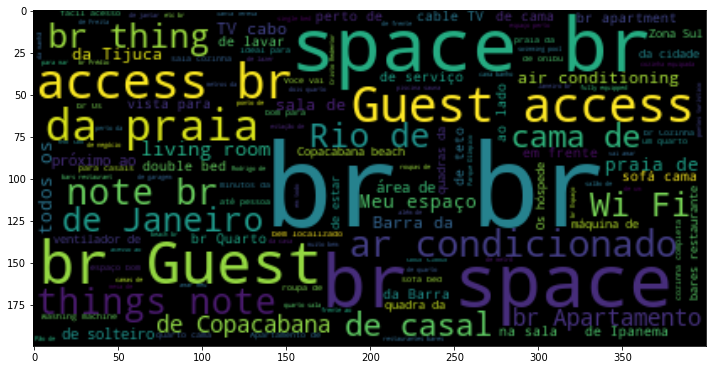

In [19]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Veja como algumas palavras como "meu" e "da" estão destacados, porém não acrescentam informação relevante. Podemos melhorar esse *wordcloud* atualizando a nossa lista de stopwords.

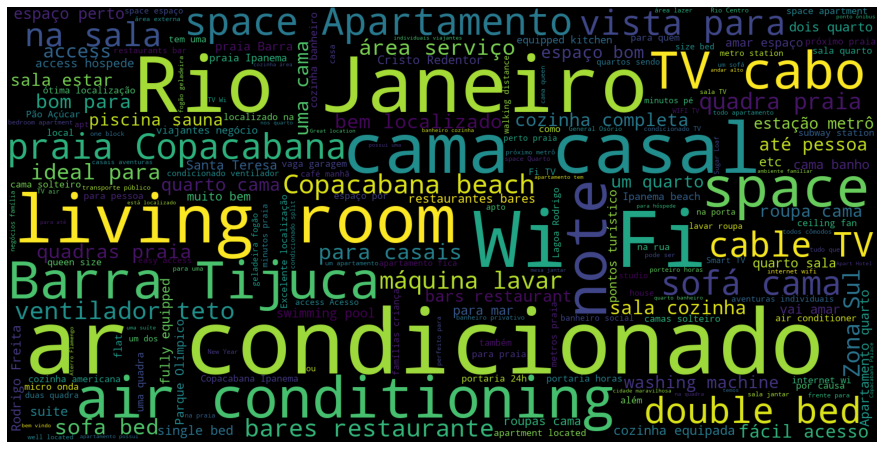

In [22]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "br", "Guest", "things"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png",)